## AirBnB investment Advice
##### by
#### Sultan Alsaedi

### STEP 1: importing the data

In [1]:
#This line is to import the external file and expand it here
#This line is to import the numpy functions and use it in this project
#This line is to import the matplotlib and use it for data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data from csv file in the laptop
AirBnB = 'AirBnB.csv'
airbnb = pd.read_csv(AirBnB)

### Checking the data  that loaded by showing samples from AirBnB
### Shows information of loaded dataset

In [2]:
airbnb.head()

,id,name,summary,space,host_id,host_url,host_name,host_since,host_location,host_about,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,7087327,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,15830506,https://www.airbnb.com/users/show/15830506,Lize & Greg,5/21/14,"Washington, District of Columbia, United States","We are two fun, friendly entrepreneurs living ...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,975833,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,5338703,https://www.airbnb.com/users/show/5338703,Sebastian,3/5/13,"New York, New York, United States","Hi I'm Sebastian. \r\nAfter ten years in DC, m...",...,65,3/22/13,9/28/15,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,8249488,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,1487418,https://www.airbnb.com/users/show/1487418,Craig,12/9/11,"Washington, District of Columbia, United States",just ask,...,1,9/10/15,9/10/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8409022,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,16970249,https://www.airbnb.com/users/show/16970249,Christopher,6/18/14,"Washington, District of Columbia, United States",NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8411173,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,30369828,https://www.airbnb.com/users/show/30369828,Joshua,3/31/15,"Baltimore, Maryland, United States",NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airbnb.shape

(3723, 64)

In [4]:
airbnb.columns

Index(['id', 'name', 'summary', 'space', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'city', 'state', 'zipcode', 'market', 'country_code',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_re

In [5]:
airbnb.isnull().sum()

id                                0
name                              0
summary                         266
space                           746
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     6
host_about                      960
host_response_time              434
host_response_rate              434
host_acceptance_rate            614
host_is_superhost                 0
host_thumbnail_url                0
host_picture_url                  0
host_neighbourhood              262
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
street                            0
neighbourhood                   353
city                              0
state                             0
zipcode                           9
market                            0
country_code                

### STEP 2: Cleaning data set.
-Review for possible...

-remove

-Check for duplicates in the unique id column (`id`)


#### Remove listings without any reviews and possible duplicate rows where the bot may have re-recorded listing data

In [6]:
airbnb =airbnb[airbnb['number_of_reviews']!=0]
airbnb[['host_name','number_of_reviews']].head()

,host_name,number_of_reviews
1,Sebastian,65
2,Craig,1
8,Qianwen,1
9,Eden Park,4
10,Danielle,5


In [7]:
airbnb=airbnb[airbnb['city']=='Washington']

airbnb[['host_name','city']].head()

,host_name,city
1,Sebastian,Washington
23,Annie,Washington
24,Joel,Washington
25,Mayrose,Washington
26,Matt,Washington


In [8]:
airbnb.duplicated().sum()

0

#### there are no duplicated rows when it comes to the ID

### Number_of_reviews*2

In [9]:
proxy_number=airbnb.number_of_reviews*2
proxy_number

1       130
23       92
24      168
25       50
26        8
27        4
28      166
29       38
30      188
31       94
32      300
33       30
35      138
36        2
37        4
38       10
39       66
40       22
41        6
42       10
43       58
44       64
45        2
46       30
48       10
51       10
52        2
55       18
58        2
59        8
       ... 
3688      2
3689      2
3690     48
3691     30
3692      6
3694      6
3696    354
3698    204
3699     14
3700     22
3702      8
3703     30
3704     14
3705    102
3706    200
3707     34
3708     28
3709     10
3710    398
3711    230
3713     16
3714     16
3715      6
3716      2
3717     16
3718     38
3719     72
3720     24
3721     96
3722      2
Name: number_of_reviews, Length: 2820, dtype: int64

In [10]:
airbnb['num_stays'] = airbnb["number_of_reviews"] * 2

In [11]:
airbnb[['num_stays', 'number_of_reviews']].head(1)

,num_stays,number_of_reviews
1,130,65


In [12]:
airbnb['price'] = airbnb['price'].str.replace('$', '').str.replace(',','')

In [13]:
airbnb['price'] = pd.to_numeric(airbnb['price'])

In [14]:
airbnb['extra_people'] = airbnb['extra_people'].str.replace('$', '').str.replace(',','')

In [15]:
airbnb['extra_people'] = pd.to_numeric(airbnb['extra_people'])

### PROMPT 1: How much revenue do successful hosts make?
###### 1 - Estimate daily revenue:


In [16]:
##step 2
#A if airbnb.guests_included >1 = price
#B if airbnb.guests_included =1 & accomedates=1=price
#C if airbnb.guests_included =1 & accomedates>1= price+extra_people



In [17]:
def daily_revenue_function(airbnb):
    if airbnb['guests_included'] > 1: 
        return airbnb['price'] 
    elif airbnb['guests_included'] == 1 and airbnb['accommodates'] == 1: 
        return airbnb['price'] 
    elif airbnb['guests_included'] == 1 and airbnb['accommodates'] > 1:
        return airbnb['price'] + airbnb['extra_people']
    
airbnb['estimated_daily_revenue'] = airbnb.apply(daily_revenue_function, axis = 1)

airbnb.head(1)


,id,name,summary,space,host_id,host_url,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_stays,estimated_daily_revenue
1,975833,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,5338703,https://www.airbnb.com/users/show/5338703,Sebastian,3/5/13,"New York, New York, United States","Hi I'm Sebastian. \r\nAfter ten years in DC, m...",...,9/28/15,94.0,10.0,9.0,10.0,10.0,9.0,9.0,130,350.0


In [18]:
airbnb[['estimated_daily_revenue', 'price', 'guests_included', 'accommodates', 'extra_people']].head(1)

,estimated_daily_revenue,price,guests_included,accommodates,extra_people
1,350.0,350.0,1,6,0.0


###### 2 - Estimate daily revenue per booking

###### Minume_nights*step 2 daily revenue


In [19]:
def per_booking(airbnb):
    return airbnb.minimum_nights*airbnb.estimated_daily_revenue
    
airbnb['revenue_per_booking'] = airbnb.apply(per_booking, axis = 1)

airbnb.head(1)

,id,name,summary,space,host_id,host_url,host_name,host_since,host_location,host_about,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_stays,estimated_daily_revenue,revenue_per_booking
1,975833,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,5338703,https://www.airbnb.com/users/show/5338703,Sebastian,3/5/13,"New York, New York, United States","Hi I'm Sebastian. \r\nAfter ten years in DC, m...",...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,130,350.0,700.0


In [20]:
airbnb[['estimated_daily_revenue', 'price', 'guests_included', 'accommodates', 'extra_people', 'revenue_per_booking']].head(1)

,estimated_daily_revenue,price,guests_included,accommodates,extra_people,revenue_per_booking
1,350.0,350.0,1,6,0.0,700.0


###### 3 - Estimated total revenue
###### Estimated total revenue =step3*step1 results

In [21]:
def total_rev(airbnb):
    return airbnb.num_stays*airbnb.revenue_per_booking
    
airbnb['total_revenue'] = airbnb.apply(total_rev, axis = 1)

airbnb.head(1)

,id,name,summary,space,host_id,host_url,host_name,host_since,host_location,host_about,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_stays,estimated_daily_revenue,revenue_per_booking,total_revenue
1,975833,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,5338703,https://www.airbnb.com/users/show/5338703,Sebastian,3/5/13,"New York, New York, United States","Hi I'm Sebastian. \r\nAfter ten years in DC, m...",...,10.0,9.0,10.0,10.0,9.0,9.0,130,350.0,700.0,91000.0


In [22]:
airbnb[['estimated_daily_revenue', 'price', 'guests_included', 'accommodates', 'extra_people', 'revenue_per_booking', 'total_revenue']].head(1)

,estimated_daily_revenue,price,guests_included,accommodates,extra_people,revenue_per_booking,total_revenue
1,350.0,350.0,1,6,0.0,700.0,91000.0


In [23]:
#PROMPT 1 :Groupbys and/or  PivotTables should contain the host name, total revenue, and number of listings

In [24]:
total_revenue_per_stay=airbnb.total_revenue/airbnb.num_stays
groupby_revenue_per_listing = airbnb.groupby('host_name').agg({ 'total_revenue':'sum','id':'count'}). \
                            rename(columns = { 'total_revenue': 'total_revenues','id': 'number_of_listings'}). \
                               sort_values(by = 'total_revenues', ascending = False)


groupby_revenue_per_listing.head(15)

,total_revenues,number_of_listings
host_name,,
Hermosa,923036.0,2
Charlotte,784536.0,31
Cliff,776106.0,26
Gohar,490140.0,4
Jessica,432646.0,11
Seamless,419822.0,42
Heather,394424.0,13
Matt And Jean,329850.0,2
The Remuzzi Brothers,314932.0,2


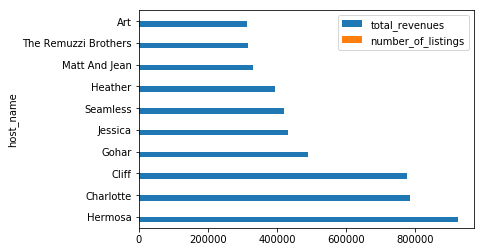

In [25]:
groupby_revenue_per_listing[:10]\
.plot(kind='barh');


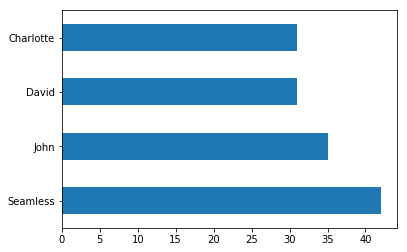

In [26]:
airbnb.host_name.value_counts()[:4].sort_values(ascending=False).plot(kind='barh')

### RECOMMENDATION

#### Our recommendation is that Hermosa received the most income. Also Hermosa received most income per listing.
#### The most listings was Seamless

### PROMPT 2: Which property types receive the most positive reviews?

● Build several Groupbys and/or PivotTables in order to quickly
explore the data at a high level:

○ Groupbys and/or PivotTables should contain the property type,
number of listings (make sure to exclude listings with no
bookings), and average rating.

○ Additional Groupbys and/or PivotTables are welcome and
useful for gaining a better understanding of the data.

###### PROMPT 2 :contain PROPERTY TYPE, ID , REVIEW SCORE RATING

In [27]:
airbnb =airbnb[airbnb['review_scores_rating']!=0]
groupby_property_type = airbnb.groupby('property_type').agg({'id':'count', 'review_scores_rating': 'mean'}). \
                            rename(columns = {'id': 'number_of_listings', 'review_scores_rating': 'average_rating'}). \
                               sort_values(by = 'number_of_listings', ascending = False)


groupby_property_type

,number_of_listings,average_rating
property_type,,
Apartment,1718,93.299882
House,938,93.602371
Condominium,48,95.791667
Townhouse,48,95.319149
Bed & Breakfast,36,92.111111
Loft,19,93.157895
Other,8,84.500000
Dorm,2,60.000000
Bungalow,1,100.000000


## We took only property types with more that 20 reviews, the range below represents a y-axis zoom to determine the highest rated type. condominium won with 95.79% rating and 48 reviews.

(90, 100)

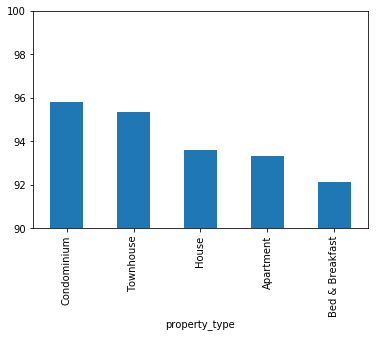

In [28]:
groupby_property_type.average_rating[:5].sort_values(ascending=False).plot(kind='bar')
axes= plt.gca()
axes.set_ylim([90,100])

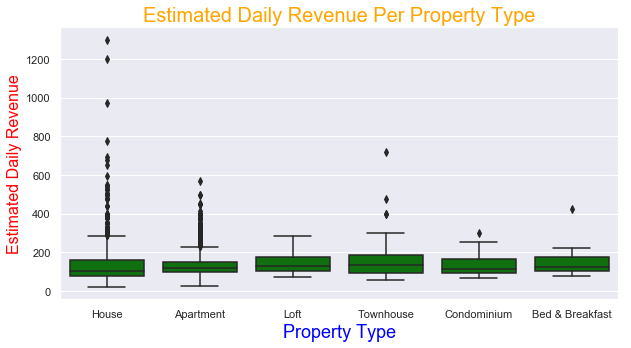

In [29]:
# fig, ax = plt.subplots(figsize = (17,10))

# plot = sns.boxplot(x = "property_type", y = "host_listings_count", data = airbnb, ax = ax)
# plot.set_title('listing vs money \n', color = 'Maroon', fontsize = 20)
# plot.set_xlabel('\n Propperty Type', color = 'black', fontsize = 17)
# plot.set_ylabel('number of listing  \n', color = 'black', fontsize = 17);


subset_air=airbnb[~airbnb['property_type'].isin(['Dorm', 'Bungalow', 'Cabin', 'Other'])]
sns.set(rc={'figure.figsize':(10,5)})
sns_plot=sns.boxplot(x='property_type',color='green', y='estimated_daily_revenue', data=subset_air);
plt.title('Estimated Daily Revenue Per Property Type',color='orange', fontsize=20);
plt.ylabel('Estimated Daily Revenue',color='red', fontsize=16), plt.xlabel('Property Type',color='blue', fontsize=18);


### RECOMMENDATION

##### Our recommendation for the property type based on most positive reviews is Condominium

### PROMPT 3: Which neighborhoods host the most listings?

###### PROMPT 3: Which neighborhoods host the most listings?
###### Groupbys and/or  PivotTables should contain MOST LISTING PER NEIGHBORHOOD

In [30]:
groupby_neighborhood_listing = airbnb.groupby('host_neighbourhood').agg({'id':'count'}). \
                            rename(columns = {'id': 'number_of_listings'}). \
                               sort_values(by = 'number_of_listings', ascending = False)


groupby_neighborhood_listing.head(10)

,number_of_listings
host_neighbourhood,
Capitol Hill,242
Columbia Heights,194
Dupont Circle,167
Logan Circle,137
U Street Corridor,124
Adams Morgan,108
Near Northeast/H Street Corridor,100
Shaw,91
Petworth,79


Text(0.5, 1.0, '% title')

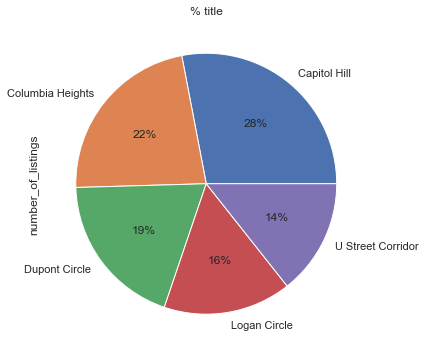

In [31]:
groupby_neighborhood_listing.sort_values('number_of_listings', ascending = False).head(5).plot.pie(y='number_of_listings', figsize=(6, 6), legend =False, autopct='%1.0f%%');

plt.title('% title')

### RECOMMENDATION

#### Our recommendation for the best neibourhood is Capital Hill

### PROMPT 4: Which neighborhoods receive the most positive reviews?


###### Groupbys and/or  PivotTables should contain best rating PER NEIGHBORHOOD

In [32]:
groupby_neighborhood_rating = airbnb.groupby('host_neighbourhood').agg({'id':'count', 'review_scores_rating': 'mean'}). \
                            rename(columns = {'id': 'number_of_listings', 'review_scores_rating': 'average_rating'}). \
                               sort_values(by=[ 'number_of_listings','average_rating'], ascending = False)


groupby_neighborhood_rating.head(10)

,number_of_listings,average_rating
host_neighbourhood,,
Capitol Hill,242,94.682008
Columbia Heights,194,93.129534
Dupont Circle,167,93.329268
Logan Circle,137,94.451852
U Street Corridor,124,94.853659
Adams Morgan,108,93.867925
Near Northeast/H Street Corridor,100,95.948980
Shaw,91,93.911111
Petworth,79,91.858974


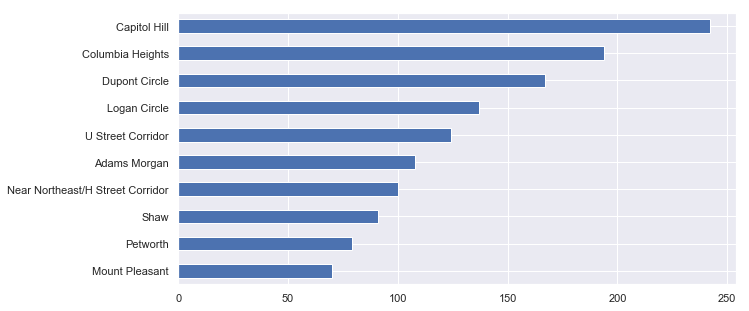

In [33]:
airbnb.host_neighbourhood.value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.xticks(rotation=0);

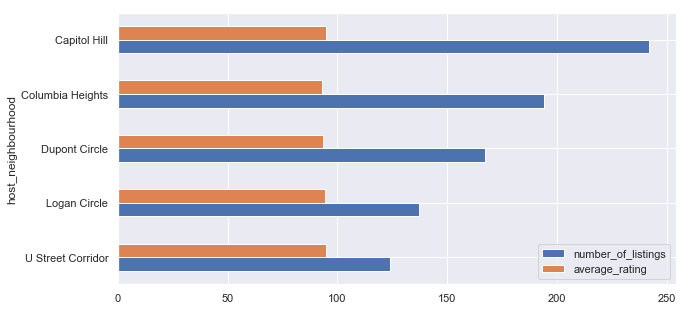

In [34]:
groupby_neighborhood_rating[:5].sort_values(by='host_neighbourhood', ascending=False)\
.plot(kind='barh');

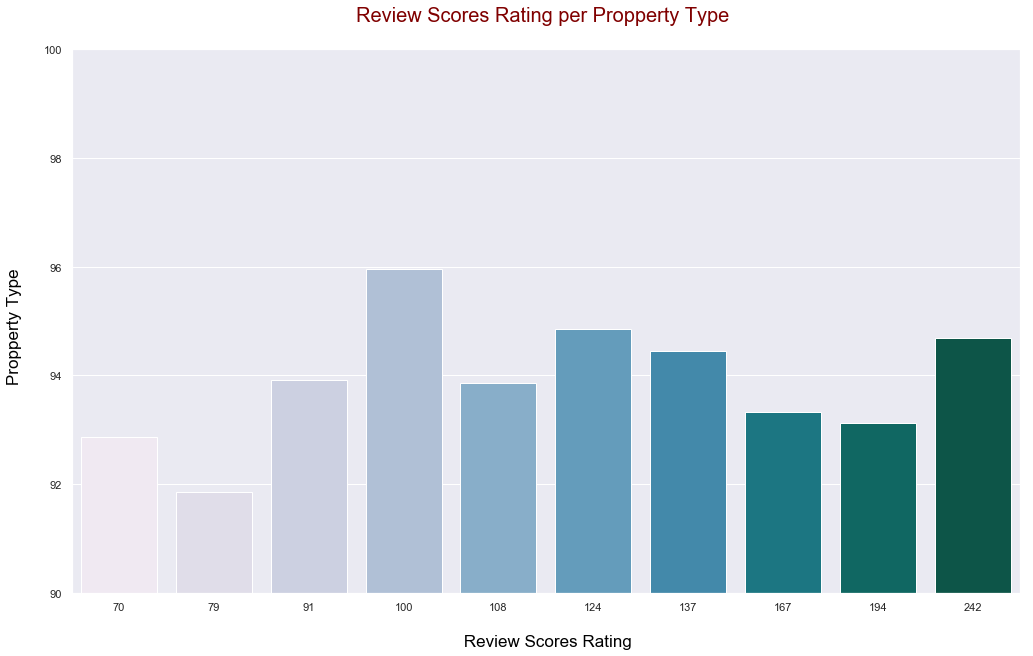

In [35]:
fig, ax = plt.subplots(figsize = (17,10))

plot = sns.barplot(x = 'number_of_listings', y = 'average_rating',
                    data = groupby_neighborhood_rating.head(10),
                        palette = 'PuBuGn', ax = ax)

plot.set_title('Review Scores Rating per Propperty Type \n', color = 'Maroon', fontsize = 20)
axes = plt.gca()
axes.set_ylim([90,100])

plot.set_xlabel('\n Review Scores Rating', color = 'black', fontsize = 17)

plot.set_ylabel('Propperty Type  \n', color = 'black', fontsize = 17);



### RECOMMENDATION

Investor should invest in Near Northeast/H Street Corridor. 

---
#    <font color='red'> Mission Accomplished</font> 


---
---
# <font color='green'> This was made by Sultan Alsaedi </font> 
# <font color='blue'> Data Scientist </font> 


## Contact me
### Email: trexercrypto@gmail.com
### Slack: @stan
### GitHub: https://github.com/stanxd/
---
---